<a href="https://colab.research.google.com/github/ishitarakchhit/Heart-Disease-Prediction-Model/blob/main/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
'exec(% matplotlib inline)'
import warnings
warnings.filterwarnings('ignore')


In [33]:
df = pd.read_csv('/content/sample_data/framingham.csv')

In [34]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [35]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [36]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [37]:
#now since education is not related to our analysis, we can drop the column
df.drop(['education'], inplace = True, axis = 1)

In [12]:
df.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [38]:
df.shape

(4240, 15)

In [39]:
# Fill missing values in 'cigsPerDay'
mean_cigs_per_day = df['cigsPerDay'].mean()  # Calculate mean for cigsPerDay
df.loc[(df['currentSmoker'] == 1) & (df['cigsPerDay'].isnull()), 'cigsPerDay'] = mean_cigs_per_day
df.loc[(df['currentSmoker'] == 0) & (df['cigsPerDay'].isnull()), 'cigsPerDay'] = 0

# Fill missing values in 'BPMeds' with mean
mean_bpmeds = df['BPMeds'].mean()
df['BPMeds'].fillna(mean_bpmeds, inplace=True)

# Fill missing values in 'totChol' with mean
mean_totchol = df['totChol'].mean()
df['totChol'].fillna(mean_totchol, inplace=True)

# Fill missing values in 'BMI' with mean
mean_bmi = df['BMI'].mean()
df['BMI'].fillna(mean_bmi, inplace=True)

# Fill missing values in 'glucose' with mean
mean_glucose = df['glucose'].mean()
df['glucose'].fillna(mean_glucose, inplace=True)

# Check if all missing values are filled
print(df.isnull().sum())

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          1
glucose            0
TenYearCHD         0
dtype: int64


In [40]:
X = np.asarray(df[['age', 'male', 'cigsPerDay',
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(df['TenYearCHD'])

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2968, 6) (2968,)
Test set: (1272, 6) (1272,)


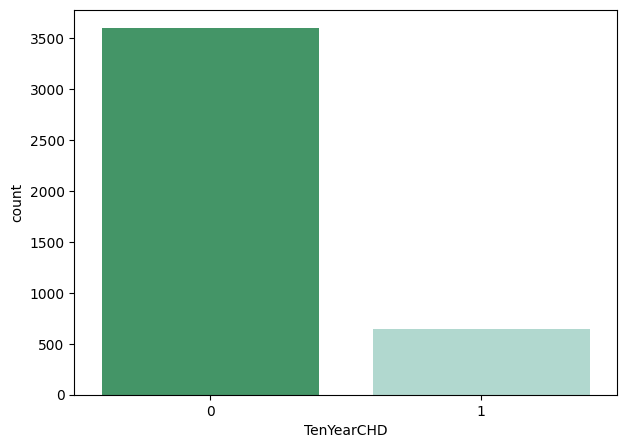

In [41]:
# counting no. of patients affected with CHD
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=df,
             palette="BuGn_r")
plt.show()

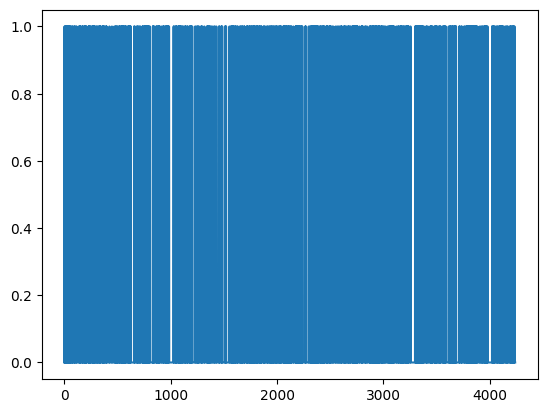

In [42]:
laste = df['TenYearCHD'].plot()
plt.show(laste)

                     male       age  currentSmoker  cigsPerDay    BPMeds  \
male             1.000000 -0.029014       0.197026    0.316023 -0.052203   
age             -0.029014  1.000000      -0.213662   -0.192534  0.122036   
currentSmoker    0.197026 -0.213662       1.000000    0.767055 -0.048621   
cigsPerDay       0.316023 -0.192534       0.767055    1.000000 -0.045847   
BPMeds          -0.052203  0.122036      -0.048621   -0.045847  1.000000   
prevalentStroke -0.004550  0.057679      -0.032980   -0.032711  0.115008   
prevalentHyp     0.005853  0.306799      -0.103710   -0.066444  0.259125   
diabetes         0.015693  0.101314      -0.044285   -0.037086  0.051584   
totChol         -0.070064  0.260691      -0.046211   -0.026182  0.078973   
sysBP           -0.035879  0.394053      -0.130281   -0.088523  0.252023   
diaBP            0.058199  0.205586      -0.107933   -0.056473  0.192387   
BMI              0.081705  0.135578      -0.167483   -0.092888  0.099586   
heartRate   

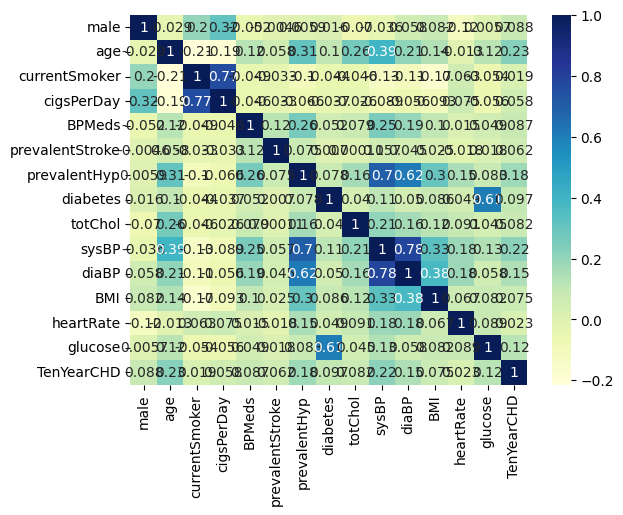

In [43]:
#plot correlation matrix
print(df.corr(numeric_only=True))

# Plotting correlation heatmap
dataplot = sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)

# Displaying heatmap
plt.show()

In [44]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [45]:
# Evaluation and accuracy
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =',
      accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.8569182389937107


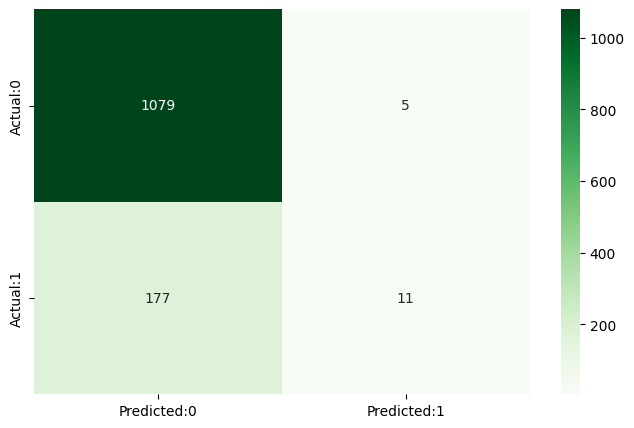

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1084
           1       0.69      0.06      0.11       188

    accuracy                           0.86      1272
   macro avg       0.77      0.53      0.52      1272
weighted avg       0.83      0.86      0.80      1272



In [46]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

# This code is modified by Susobhan Akhuli